<a href="https://colab.research.google.com/github/mar-wong/JupyterLab_Labor/blob/main/Newton_Abkuehlen_ODE_Sliders2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='red'>**Numerische Lösung der DLG 1.Ordnung zum Newtonschen Abkühlungsgesetz** </font>

In [ ]:
%%capture
%pip install matplotlib pandas scikit-learn scipy

Newtons Abkühlungsgesetz kann folgendermaßen zusammengefasst werden:

Die Geschwindigkeit der Temperaturänderung eines Objekts ist proportional zum Unterschied zwischen seiner Temperatur und der Umgebungstemperatur $T_{U} $. $$ \frac{dT}{T\ -T_{U} \ } \ =\ -\ k\cdot dt $$

* $\frac{dT}{dt\ }$ die Änderungsrate der Temperatur über die Zeit.
*  k ist  eine positive Proportionalitätskonstante, auch Abkühlungskonstante oder Wärmeübergangskoeffizient genannt.Die Proportionalitätskonstante hängt von der Oberfläche, der Masse und der spezifischen Wärmekapazität des Körpers sowie vom Konvektionskoeffizient ab.
* $ T_0 $ ist die Anfangstemperatur des Körpers

Die exakte Lösung dieser Differentialgleichung ist
$$T( t) \ =\ T_{U} \ +\ ( T_{0} \ -T_{U}) \cdot e^{-k\cdot t} $$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from ipywidgets import interact, FloatSlider, IntSlider, FloatText

## Numerische Lösung der Differentialgleichung mit Hilfe der Libraries vom SciPy
[scipy.integrate.solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy-integrate-solve-ivp).

Die Wirkung der Anfangstemperatur $T_0 $, der Temperatur der der Umgebung $T_U$ sowie der Abkühlungskonstante k auf den zetlichen Verlauf der Temperatur T eines Körpers lässt sich mit Hilfe der Sliders untersuchen.

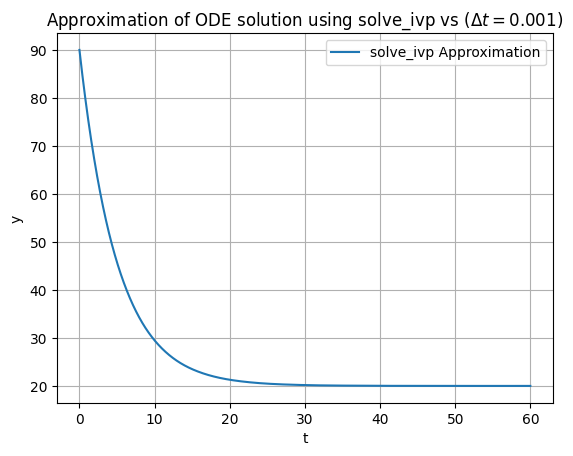

In [ ]:
#Numerische Lösung der ODE 1.Ordnung zum Abkühlungsgesetz von Newton

def solve_ivp_plot(dx,k, T_U, T_0):
    # Define the right-hand side function for the ODE
    function = lambda t, y: -k*(y - T_U)


    # Initial condition
    y0 = [T_0]

    # Time span
    t_span = [0, 60]

    # Solve the ODE using solve_ivp
    sol = solve_ivp(function, t_span, y0, t_eval=np.arange(0, 60, dx))



    # Plotting the solve_ivp approximation and e^x on the same graph
    plt.plot(sol.t, sol.y[0], label='solve_ivp Approximation')
    #plt.plot(t_values, e_values, label='e^x')
    plt.xlabel('t')
    plt.ylabel('y')
    plt.title(f'Approximation of ODE solution using solve_ivp vs ($\Delta t = {dx}$)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call solve_ivp_plot for different values of dt
for dt in [0.001]:
    solve_ivp_plot(dt)

T_0_slider = FloatSlider(value=0.4, min=0.1, max=2, step=0.01, description='T_0:')
k_slider = FloatSlider(value=0.05, min=0.01, max=0.1, step=0.01, description='k:')
T_U_slider = FloatSlider(value=0.8, min=0.2, max=3, step=0.01, description='T_U:')
interact(plot_func, T_0=T_0_slider, k=k_slider, T_U=T_U_slider )
pass